# EDA - Gorjetas!

## Importando base de Dados

In [1]:
import pandas as pd

In [2]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [3]:
dataset = pd.read_csv('tips.csv')

In [4]:
dataset.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Tradução

In [5]:
# Mostra todas as colunas do dataset
dataset.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
rename = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day': 'dia_da_semana',
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'
}

In [7]:
type(dataset)


pandas.core.frame.DataFrame

In [8]:
gorjetas = dataset.rename( columns = rename)

In [9]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [10]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [12]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [13]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [14]:
dia_semana = {
    'Sun' : 'Domingo', 
    'Sat' :  'Sabado',
    'Thur' : 'Quinta-Feira',
    'Fri' : 'Sexta-Feira'
}

In [15]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dia_semana)

In [16]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sabado,Dinner,3
240,27.18,2.00,Sim,Sabado,Dinner,2
241,22.67,2.00,Sim,Sabado,Dinner,2
242,17.82,1.75,Não,Sabado,Dinner,2


In [17]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [18]:
hora_dia = {
    'Dinner' : 'Janta', 
    'Lunch' : 'Almoço',
}

In [19]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora_dia)

In [20]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta-Feira', 'Sexta-Feira'], dtype=object)

In [21]:
gorjetas.hora_do_dia.unique()

array(['Janta', 'Almoço'], dtype=object)

In [22]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Janta,2
1,10.34,1.66,Não,Domingo,Janta,3
2,21.01,3.50,Não,Domingo,Janta,3
3,23.68,3.31,Não,Domingo,Janta,2
4,24.59,3.61,Não,Domingo,Janta,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sabado,Janta,3
240,27.18,2.00,Sim,Sabado,Janta,2
241,22.67,2.00,Sim,Sabado,Janta,2
242,17.82,1.75,Não,Sabado,Janta,2


## Importando o seaborn

In [23]:
import seaborn as sns

# Análise I - Valor da conta e gorjeta

In [24]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

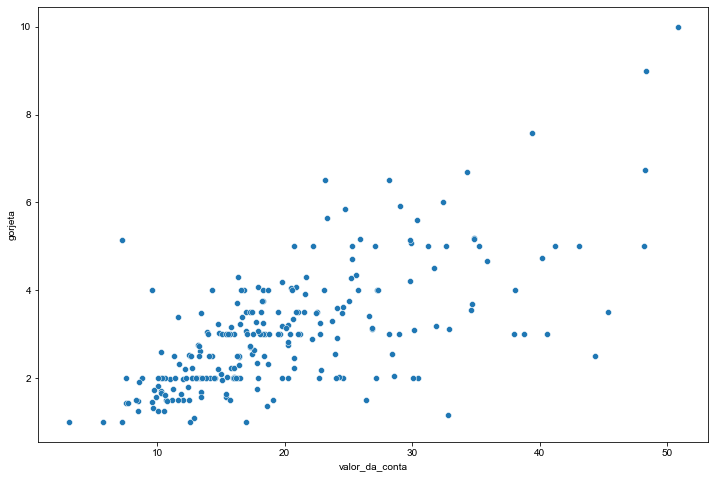

In [25]:
dispersao = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)
dispersao.figure.set_size_inches(12 , 8)
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [26]:
# Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta

In [27]:
gorjetas.shape[0]

244

In [28]:
print(f'A base de dados contem {gorjetas.shape[0]} registros \n')
print('Registros não nulos')
gorjetas.count()

A base de dados contem 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando % no dataframe

In [29]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Janta,2
1,10.34,1.66,Não,Domingo,Janta,3
2,21.01,3.50,Não,Domingo,Janta,3
3,23.68,3.31,Não,Domingo,Janta,2
4,24.59,3.61,Não,Domingo,Janta,4


In [30]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [31]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.059447
1,10.34,1.66,Não,Domingo,Janta,3,0.160542
2,21.01,3.50,Não,Domingo,Janta,3,0.166587
3,23.68,3.31,Não,Domingo,Janta,2,0.139780
4,24.59,3.61,Não,Domingo,Janta,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sabado,Janta,3,0.203927
240,27.18,2.00,Sim,Sabado,Janta,2,0.073584
241,22.67,2.00,Sim,Sabado,Janta,2,0.088222
242,17.82,1.75,Não,Sabado,Janta,2,0.098204


In [32]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15


<AxesSubplot:title={'center':'Analise do valor da gorjeta em função da conta'}, xlabel='Valor da conta', ylabel='Valor da gorjeta'>

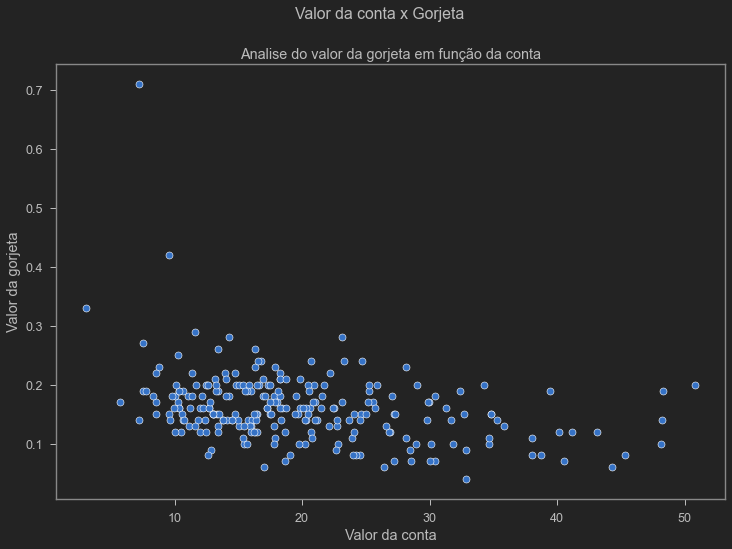

In [33]:
porcentagem_conta = sns.scatterplot( x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)
porcentagem_conta.figure.set_size_inches(12 , 8)
porcentagem_conta.figure.suptitle('Valor da conta x Gorjeta')
porcentagem_conta.set_title('Analise do valor da gorjeta em função da conta')
porcentagem_conta.set(ylabel = 'Valor da gorjeta', xlabel = 'Valor da conta')
porcentagem_conta

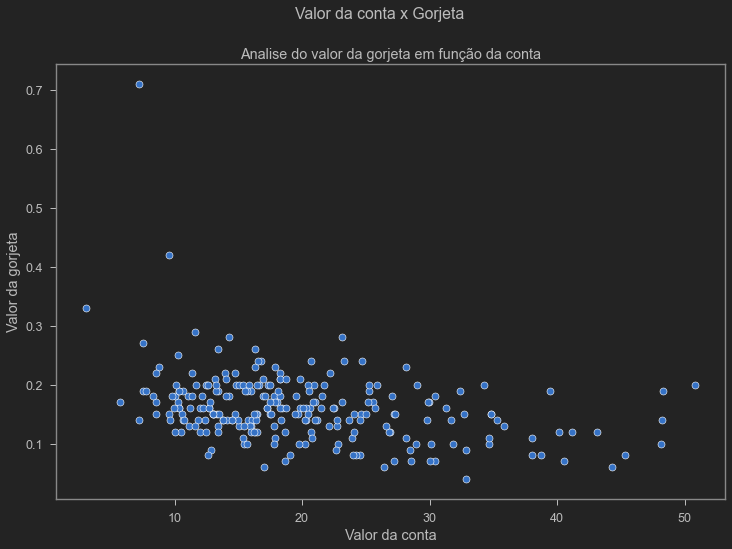

In [34]:
porcentagem_conta.get_figure()

In [35]:
# Visualmente, o valor da conta não é proporcional ao valor da gorjeta

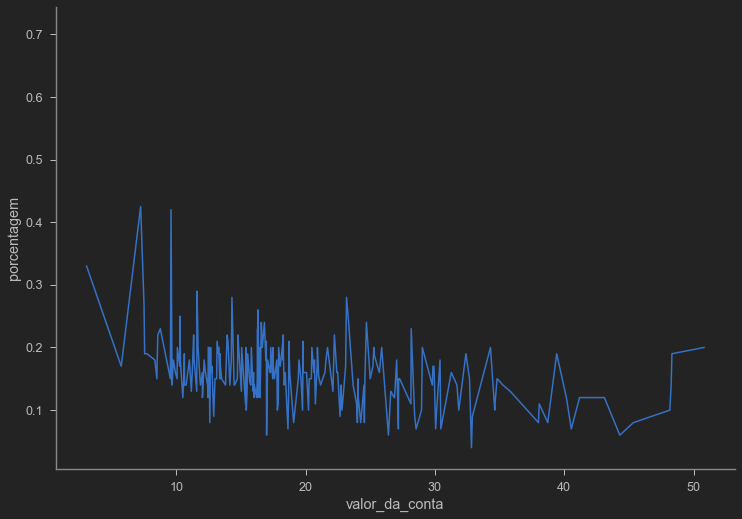

In [36]:
porcentagem_conta_linha = sns.relplot( x = 'valor_da_conta', y = 'porcentagem', data = gorjetas, kind = 'line')
porcentagem_conta_linha.figure.set_size_inches(12,8)

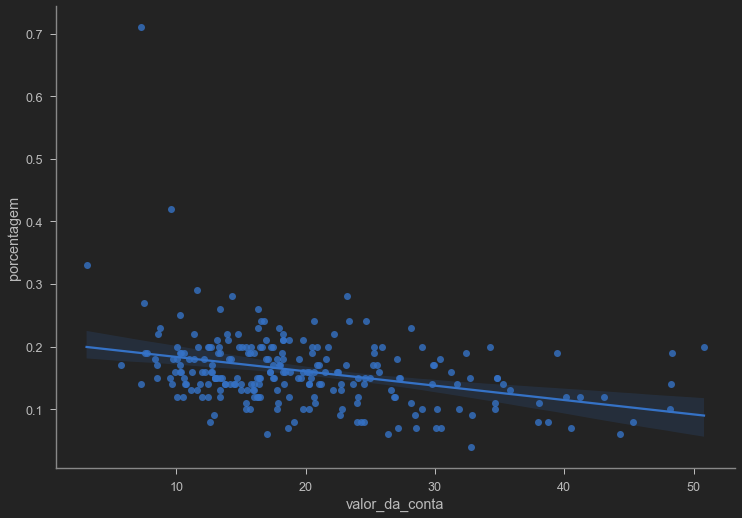

In [37]:
lmplot = sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)
lmplot.figure.set_size_inches(12,8)

# Análise II - Pedir sobremesa altera o valor da gorjeta?

In [38]:
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sabado,Janta,4,0.08
58,11.24,1.76,Sim,Sabado,Janta,2,0.16
60,20.29,3.21,Sim,Sabado,Janta,2,0.16
61,13.81,2.00,Sim,Sabado,Janta,2,0.14
62,11.02,1.98,Sim,Sabado,Janta,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sabado,Janta,2,0.19
236,12.60,1.00,Sim,Sabado,Janta,2,0.08
237,32.83,1.17,Sim,Sabado,Janta,2,0.04
240,27.18,2.00,Sim,Sabado,Janta,2,0.07


In [39]:
gorjetas.query('sobremesa == "Sim"')

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sabado,Janta,4,0.08
58,11.24,1.76,Sim,Sabado,Janta,2,0.16
60,20.29,3.21,Sim,Sabado,Janta,2,0.16
61,13.81,2.00,Sim,Sabado,Janta,2,0.14
62,11.02,1.98,Sim,Sabado,Janta,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sabado,Janta,2,0.19
236,12.60,1.00,Sim,Sabado,Janta,2,0.08
237,32.83,1.17,Sim,Sabado,Janta,2,0.04
240,27.18,2.00,Sim,Sabado,Janta,2,0.07


In [40]:
# Detalhes de quem pediu a sobremesa
gorjetas.query('sobremesa == "Sim"').describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.00,93.00,93.00,93.00
mean,20.76,3.01,2.41,0.16
std,9.83,1.40,0.81,0.09
min,3.07,1.00,1.00,0.04
25%,13.42,2.00,2.00,0.11
50%,17.92,3.00,2.00,0.15
75%,26.86,3.68,3.00,0.20
max,50.81,10.00,5.00,0.71


In [41]:
# Detalhes de quem não pediu sobremesa
gorjetas.query('sobremesa == "Não"').describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.00,151.00,151.00,151.00
mean,19.19,2.99,2.67,0.16
std,8.26,1.38,1.02,0.04
min,7.25,1.00,1.00,0.06
25%,13.32,2.00,2.00,0.14
50%,17.59,2.74,2.00,0.16
75%,22.76,3.50,3.00,0.18
max,48.33,9.00,6.00,0.29


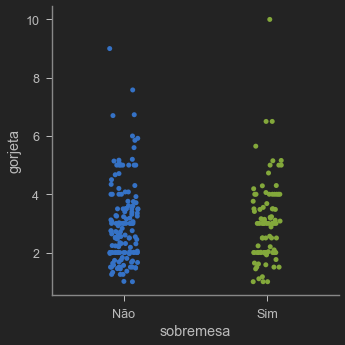

In [42]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

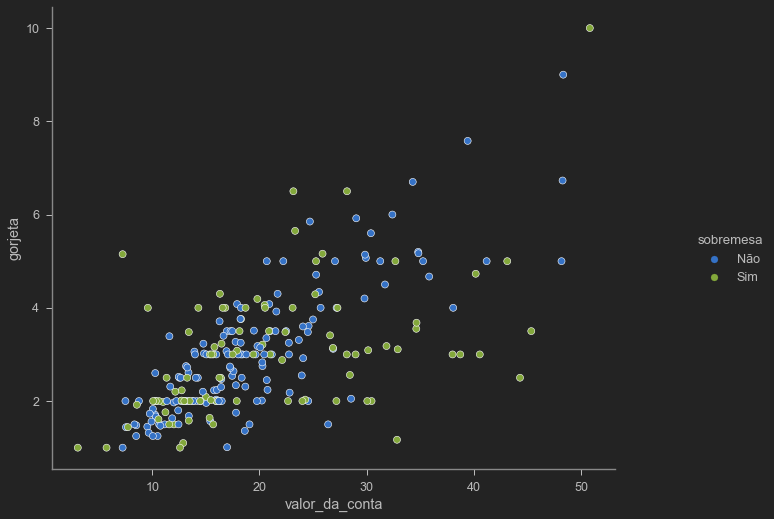

In [43]:
ax = sns.relplot(x =  'valor_da_conta', y = 'gorjeta' , data = gorjetas, hue = 'sobremesa')
ax.figure.set_size_inches(12,8)

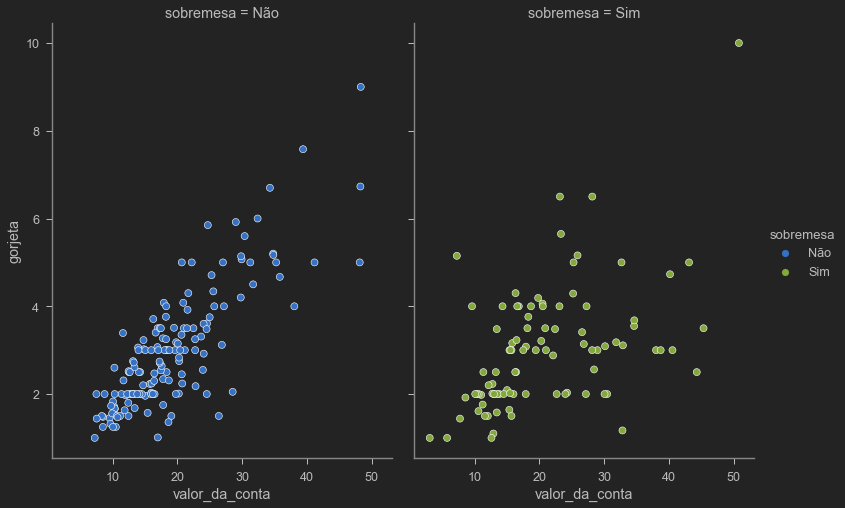

In [44]:
ax = sns.relplot(x =  'valor_da_conta', y = 'gorjeta' , data = gorjetas, hue = 'sobremesa' ,col = 'sobremesa')
ax.figure.set_size_inches(12,8)

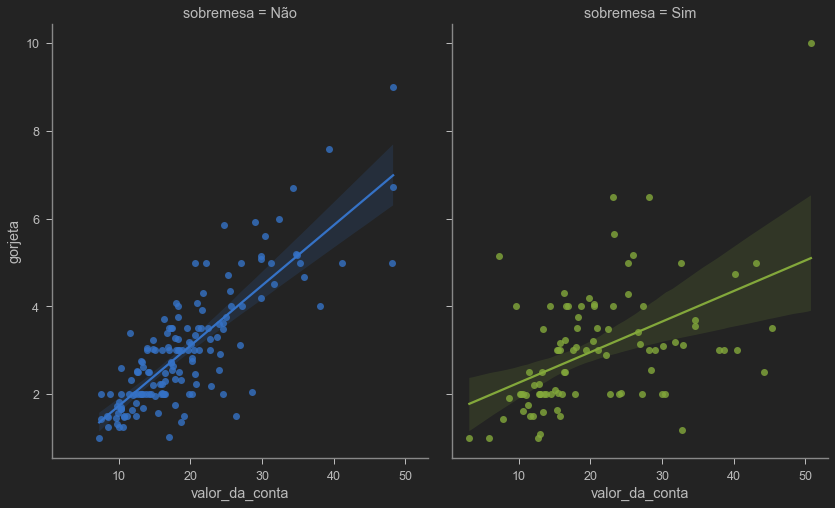

In [45]:
ax = sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', hue = 'sobremesa', data=gorjetas)
ax.figure.set_size_inches(12,8)

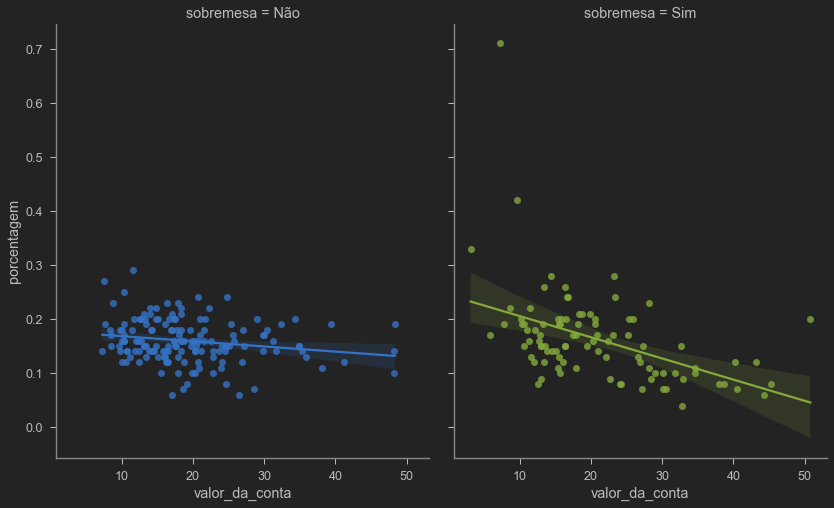

In [46]:
ax = sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', col = 'sobremesa', hue = 'sobremesa', data=gorjetas)
ax.figure.set_size_inches(12,8)

In [47]:
## Visualmente existe diferença no valor da gorjeta daqueles que pediram sobremesa e nao pediram sobremesa

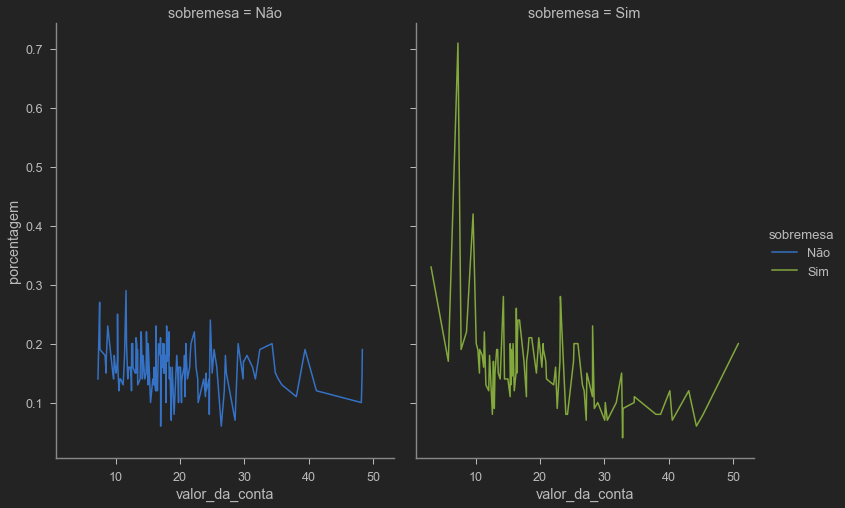

In [48]:
ax = sns.relplot(x =  'valor_da_conta', y = 'porcentagem' , data = gorjetas, hue = 'sobremesa' ,col = 'sobremesa', kind = 'line')
ax.figure.set_size_inches(12,8)

## Teste de Hipótese

H<sup>null</sup>

A distribuição da taxa da gorjeta é a mesma nos dois grupos

H<sup>alt</sup>

A disitribuição da taxa da gorjeta não é a mesma

In [49]:
from scipy.stats import ranksums

In [50]:
sobremesa = gorjetas.query('sobremesa == "Sim"').porcentagem

In [51]:
sem_sobremesa = gorjetas.query('sobremesa == "Não"').porcentagem

In [52]:
r = ranksums(sobremesa, sem_sobremesa)

In [53]:
r

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [54]:
print(f'O valor de p-value é {r.pvalue.round(2)}. De forma que aceitamos a hipotese nula')

O valor de p-value é 0.53. De forma que aceitamos a hipotese nula


# Análise III - Dia da semana

In [55]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Janta,2,0.06
1,10.34,1.66,Não,Domingo,Janta,3,0.16
2,21.01,3.50,Não,Domingo,Janta,3,0.17
3,23.68,3.31,Não,Domingo,Janta,2,0.14
4,24.59,3.61,Não,Domingo,Janta,4,0.15


In [56]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta-Feira', 'Sexta-Feira'], dtype=object)

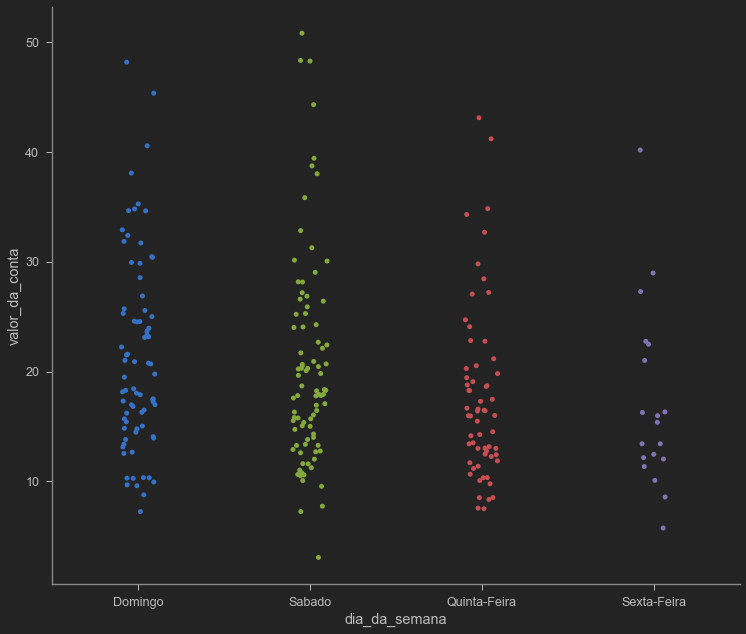

In [57]:
ax = sns.catplot( x= 'dia_da_semana', y= 'valor_da_conta', data = gorjetas)
ax.figure.set_size_inches(12,10)

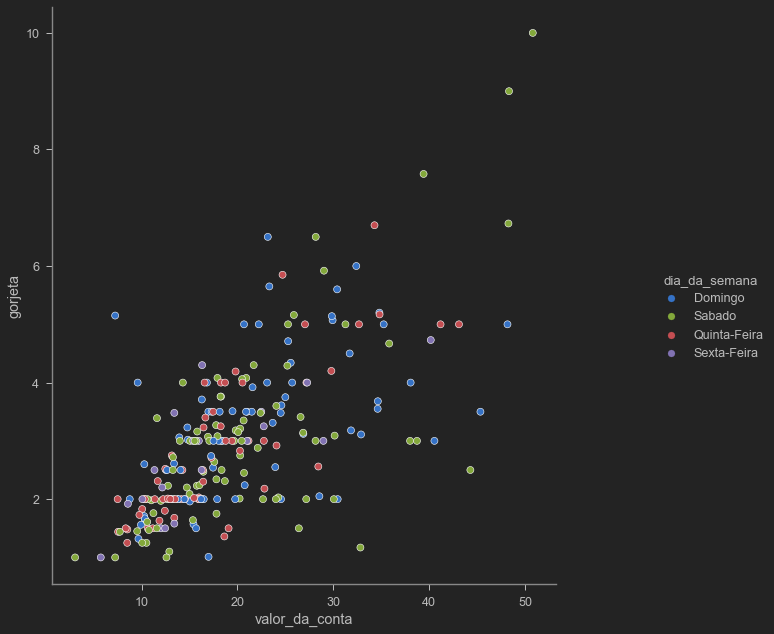

In [58]:
ax = sns.relplot ( x = 'valor_da_conta' , y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas)
ax.figure.set_size_inches(12,10)

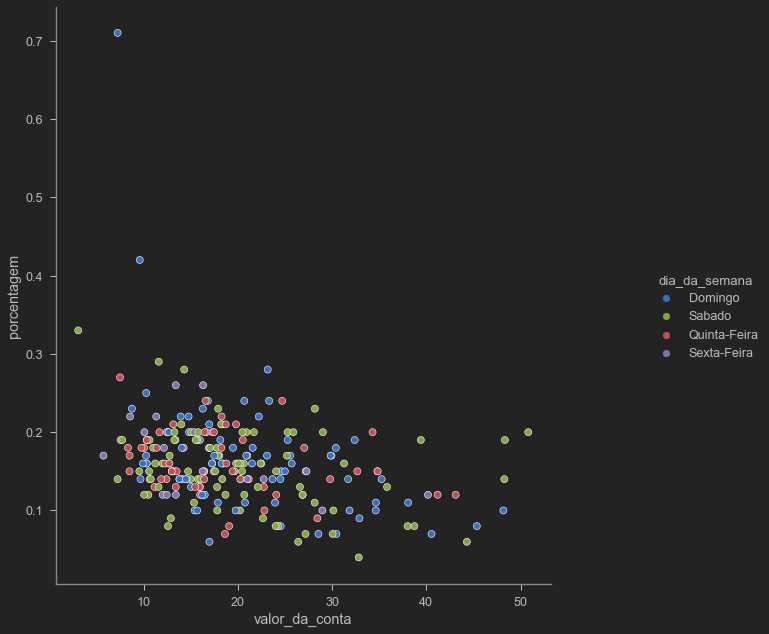

In [59]:
ax = sns.relplot ( x = 'valor_da_conta' , y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas)
ax.figure.set_size_inches(12,10)

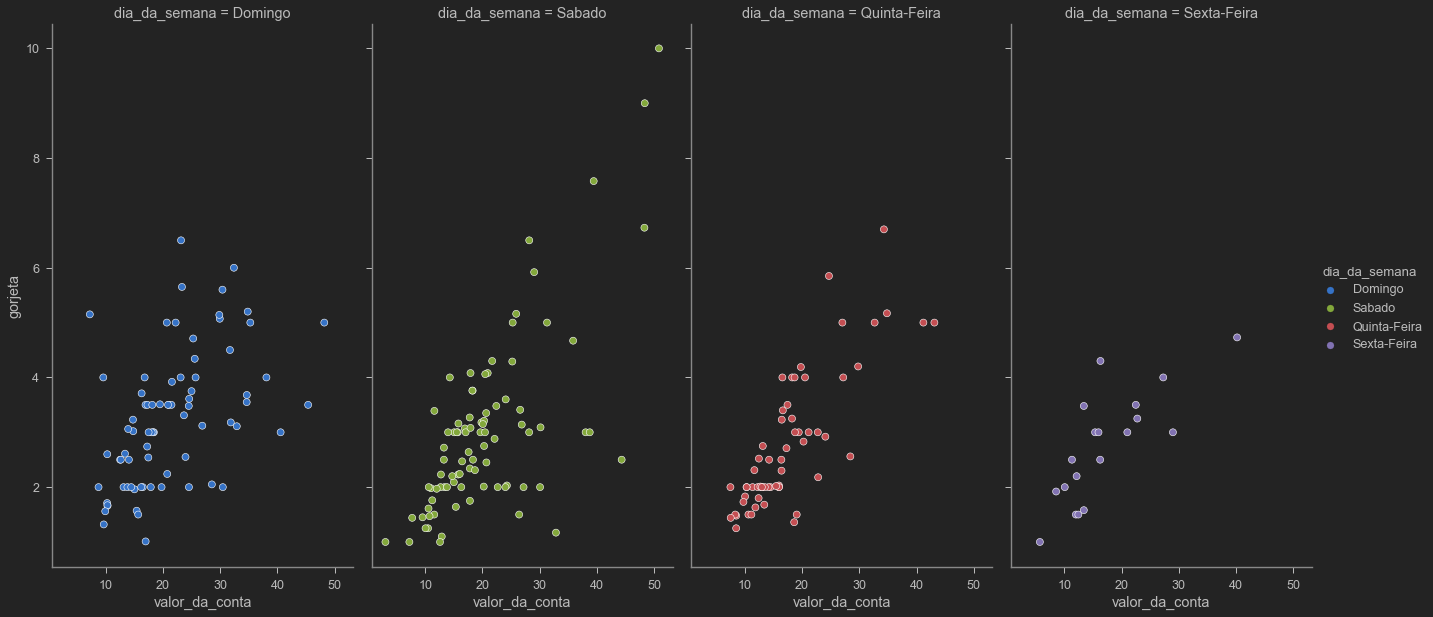

In [60]:
ax = sns.relplot ( x = 'valor_da_conta' , y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas, col = 'dia_da_semana')
ax.figure.set_size_inches(20,10)

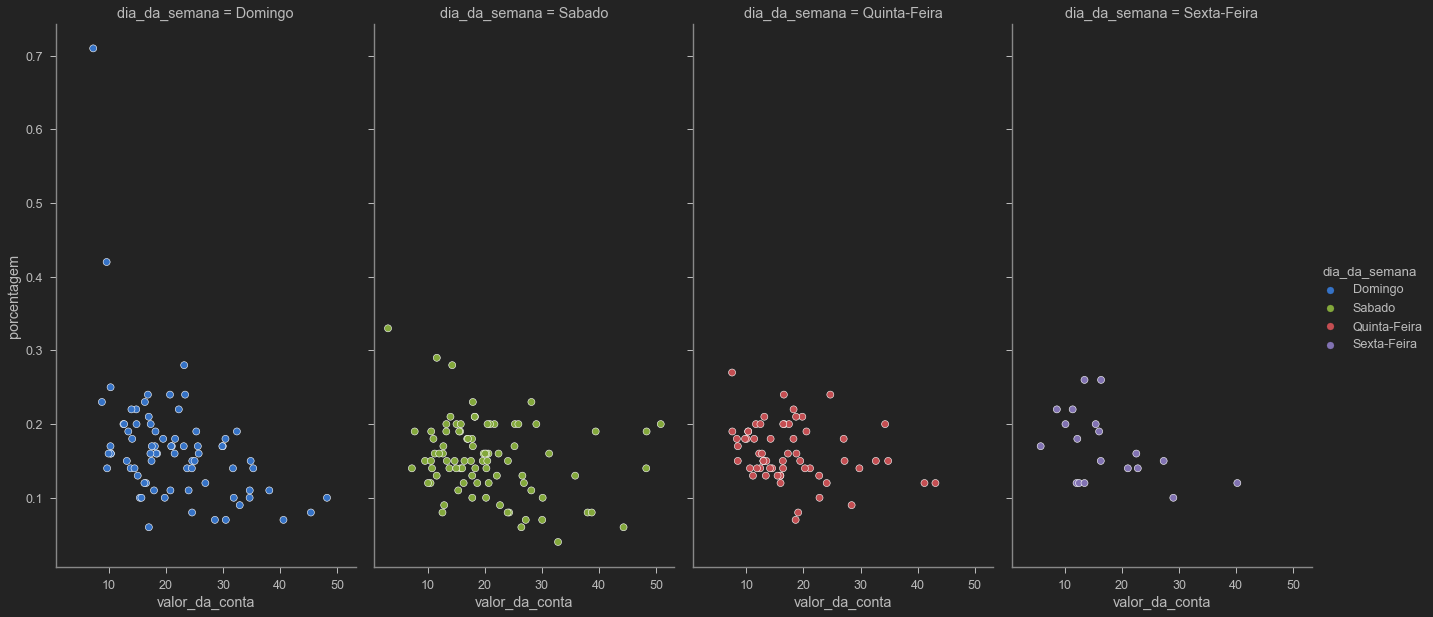

In [61]:
ax = sns.relplot ( x = 'valor_da_conta' , y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas, col = 'dia_da_semana')
ax.figure.set_size_inches(20,10)

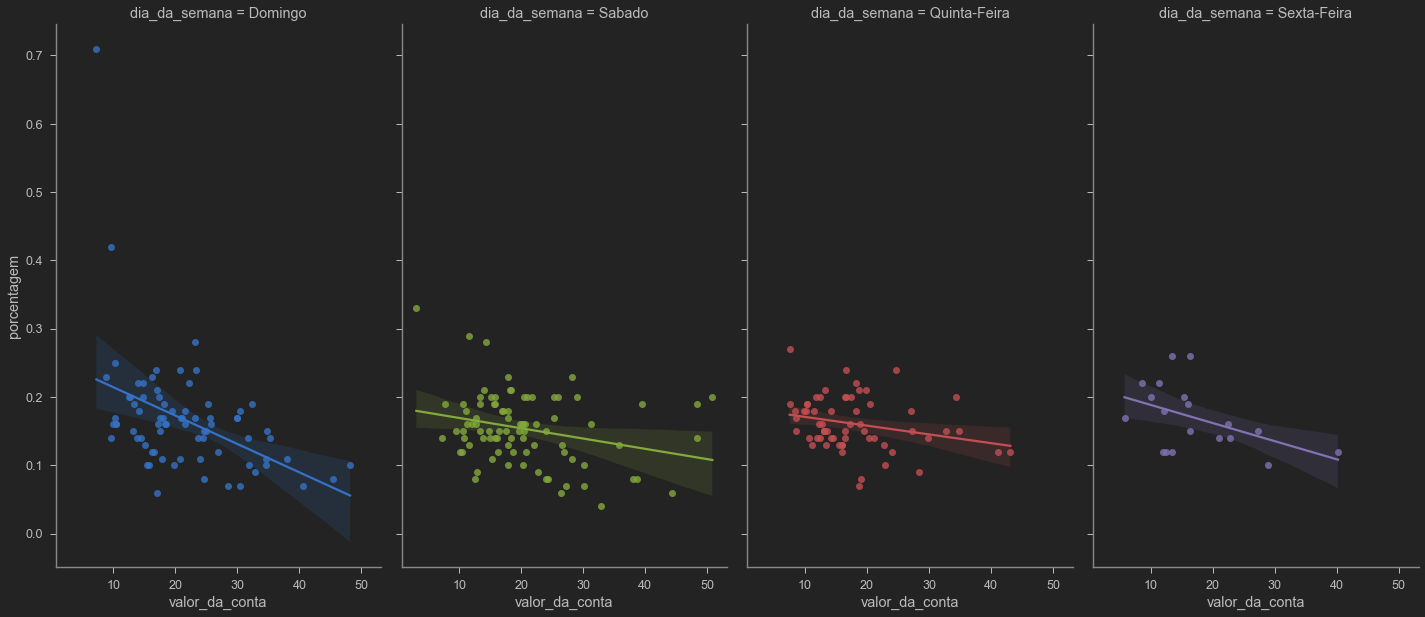

In [62]:
ax = sns.lmplot ( x = 'valor_da_conta' , y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas, col = 'dia_da_semana')
ax.figure.set_size_inches(20,10)

In [63]:
media_geral_gorjeta = gorjetas.gorjeta.mean()

In [64]:
# Calculando media geral das gorjetas de todo o dataframe
print(f'A media geral das gorjetas é de: {round(media_geral_gorjeta,3)}')

A media geral das gorjetas é de: 2.998


In [65]:
# Calculando a media geral das gorjetas por dia da semana
gorjetas.groupby(['dia_da_semana']).mean().round(3)[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410,3.255,0.167
Quinta-Feira,17.683,2.771,0.161
Sabado,20.441,2.993,0.154
Sexta-Feira,17.152,2.735,0.169


In [66]:
# Descrever a frequencia de cada dia
print('Frequencia dos dias')
gorjetas.dia_da_semana.value_counts()

Frequencia dos dias


Sabado          87
Domingo         76
Quinta-Feira    62
Sexta-Feira     19
Name: dia_da_semana, dtype: int64

## Teste de Hipotese

In [67]:
# H0 = A distribiuição do valor da conta de sabado é igual ao de domingo
# H1 = A distribuição do valor da conta NÃO é igual ao sabados e domingos

In [68]:
from scipy.stats import ranksums

In [69]:
valor_conta_sabado = gorjetas.query("dia_da_semana =='Sabado'").valor_da_conta

In [70]:
valor_conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [71]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_da_conta, Length: 76, dtype: float64

In [72]:
r = ranksums(valor_conta_sabado, valor_conta_domingo)
print (f'O p-valor para a comparação é de: {r.pvalue.round(3)}')
print('A distribuição do valor da conta é igual nos Sabados e Domingos')

O p-valor para a comparação é de: 0.358
A distribuição do valor da conta é igual nos Sabados e Domingos


# Análise IV - Hora do dia

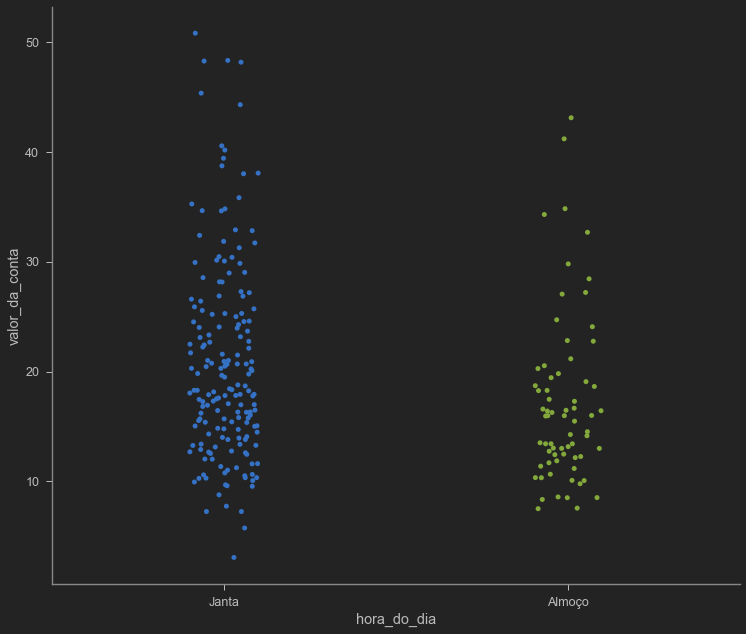

In [73]:
ax = sns.catplot(x = 'hora_do_dia', y = "valor_da_conta" , data = gorjetas)
ax.figure.set_size_inches(12,10)

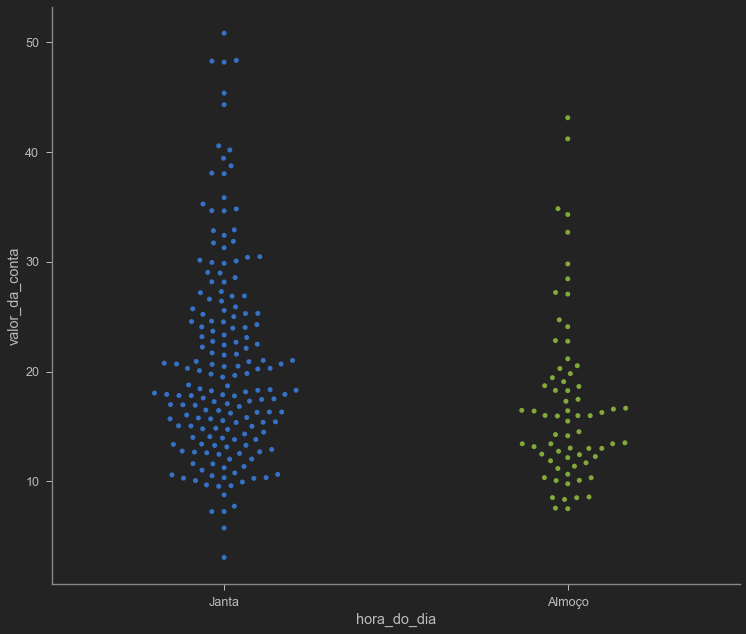

In [74]:
ax = sns.catplot(x = 'hora_do_dia', y = "valor_da_conta" , data = gorjetas, kind = 'swarm')
ax.figure.set_size_inches(12,10)

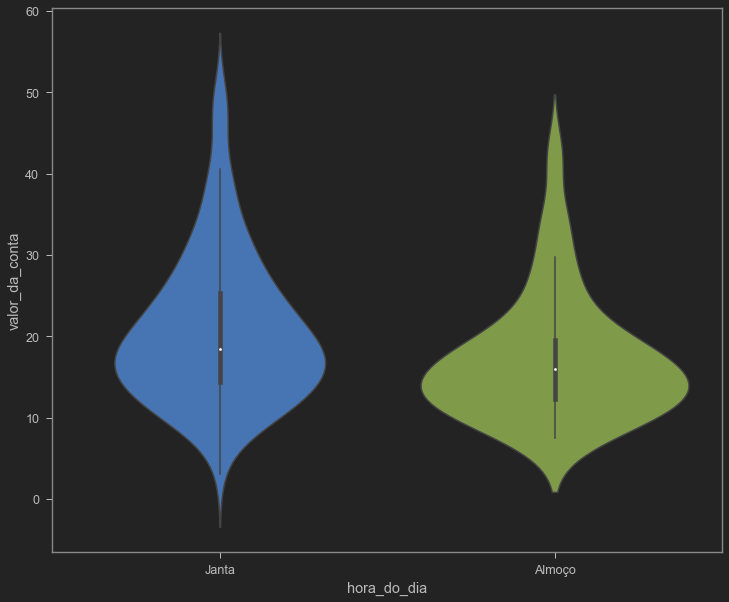

In [75]:
ax = sns.violinplot(x = 'hora_do_dia', y = "valor_da_conta" , data = gorjetas)
ax.figure.set_size_inches(12,10)

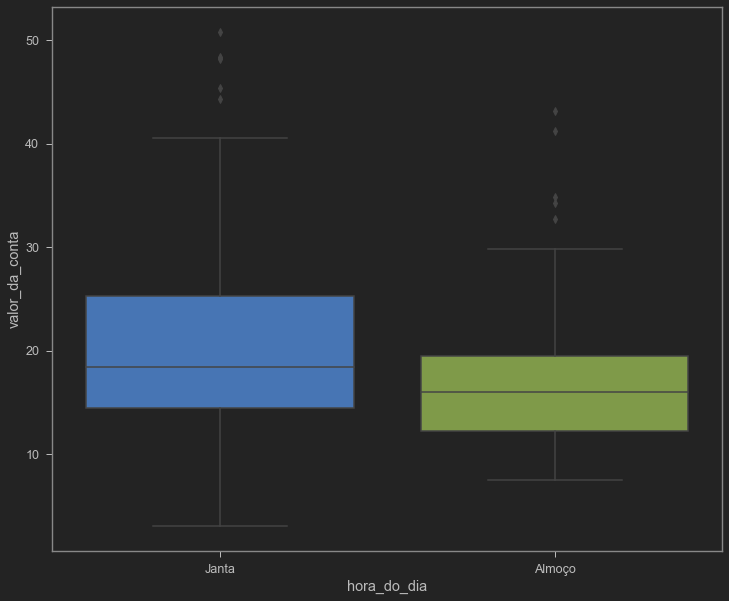

In [76]:
ax = sns.boxplot(x = 'hora_do_dia', y = "valor_da_conta" , data = gorjetas)
ax.figure.set_size_inches(12,10)

In [77]:
# Distplot almoço
almoco = gorjetas.query('hora_do_dia == "Almoço"').valor_da_conta

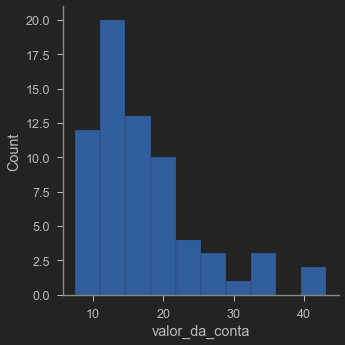

In [78]:
sns.displot(almoco, kde = False)

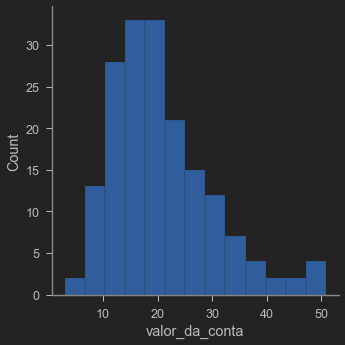

In [79]:
# Distplot Janta
jantar = gorjetas.query('hora_do_dia == "Janta"').valor_da_conta
sns.displot(jantar)

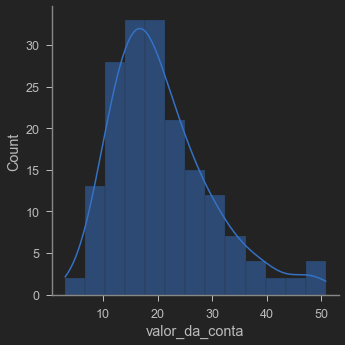

In [80]:
# Distplot Jantar
jantar = gorjetas.query('hora_do_dia == "Janta"').valor_da_conta
sns.displot(jantar, kde = True)

In [81]:
gorjetas.groupby(['hora_do_dia']).mean().round(3)[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.169,2.728,0.164
Janta,20.797,3.103,0.160


## Teste de Hipotese

In [82]:
from scipy.stats import ranksums


In [83]:
# H0 - A distribuição do valor da conta é igual aos sabados e domingos
# H1 - A distribuição do valor da conta não é igual aos sabados e domingos
r = ranksums (almoco, jantar)
r

RanksumsResult(statistic=-3.2438872807262955, pvalue=0.0011791039723641672)

In [84]:
print (f'O valor de pvalue é {round(r.pvalue,3)}. Sendo que é menor que 0.05, logo, rejeita-se H0')

O valor de pvalue é 0.001. Sendo que é menor que 0.05, logo, rejeita-se H0


In [85]:
## Testando a porcentagem

In [86]:
 porcentagem_almoco = gorjetas.query('hora_do_dia == "Almoço"').porcentagem

In [87]:
 porcentagem_jantar = gorjetas.query('hora_do_dia == "Janta"').porcentagem

In [88]:
r = ranksums (porcentagem_almoco, porcentagem_jantar)
r

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)

In [89]:
# pvalue > 0.05 